$\textbf{Packages}$

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

$\textbf{Résumé kaggle :}$

Les jeux de données contiennent des transactions effectuées par carte de crédit en septembre 2013 par des titulaires de carte européens. Cet ensemble de données présente les transactions qui ont eu lieu en deux jours, où nous avons 492 fraudes sur 284 807 transactions. L'ensemble de données est très déséquilibré, la classe positive (fraudes) représente 0,172% de toutes les transactions.

Il ne contient que des variables d'entrée numériques qui sont le résultat d'une transformation PCA. Malheureusement, en raison de problèmes de confidentialité, nous ne pouvons pas fournir les fonctionnalités d'origine et plus d'informations sur les données. Les fonctionnalités V1, V2, ... V28 sont les principaux composants obtenus avec PCA, les seules fonctionnalités qui n'ont pas été transformées avec PCA sont 'Time' et 'Amount'. La fonction «Time» contient les secondes écoulées entre chaque transaction et la première transaction de l'ensemble de données. La fonctionnalité «Montant» est le montant de la transaction, cette fonctionnalité peut être utilisée pour un apprentissage sensible au coût dépendant de l'exemple. La fonction 'Classe' est la variable de réponse et prend la valeur 1 en cas de fraude et 0 sinon.

$\textbf{Remarques:}$

Les données de fraudes à la carte de crédit. On est dans un cas très classique d'application du machine learning, les données d'apprentissage sont basées sur une variable cible binaire. Bien entendu, il y a beaucoup plus de 0 (pas de fraude liée à une transaction) que de 1 (fraude liée à une transaction). Imaginons que 95% des transactions soient sans fraude (y=0). Dans ce cas, si nous créons un algorithme de classification qui va classer toutes les transactions en tant que non frauduleuses, le pourcentage de bien classés sera alors de 95% alors que la qualité du modèle est catastrophique.

Identifiez les transactions frauduleuses par carte de crédit.

Étant donné le rapport de déséquilibre de classe, nous recommandons de mesurer la précision à l'aide de la zone sous la courbe de rappel de précision (AUPRC). La précision de la matrice de confusion n'est pas significative pour une classification déséquilibrée.

In [3]:
Data = pd.read_csv("creditcard.csv")

In [32]:
Data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [33]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

# Exploratory data analysis

In [34]:
Data.isnull().values.any()

False

([<matplotlib.axis.XTick at 0x233ca916f98>,
 <a list of 2 Text xticklabel objects>)

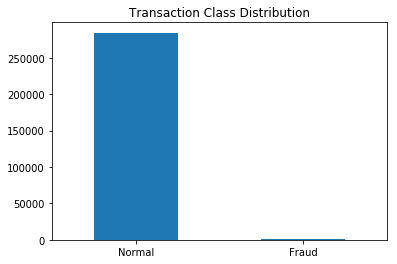

In [35]:
count_classes = pd.value_counts(Data['Class'], sort = True)
count_classes.plot(kind = 'bar', rot = 0)
plt.title("Transaction Class Distribution")
plt.xticks(range(2), ["Normal", "Fraud"] )

In [36]:
fraud = Data[Data['Class']==1]
normal = Data[Data['Class']==0]

In [37]:
print(fraud.shape,normal.shape)

(492, 31) (284315, 31)


In [38]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [39]:
normal.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

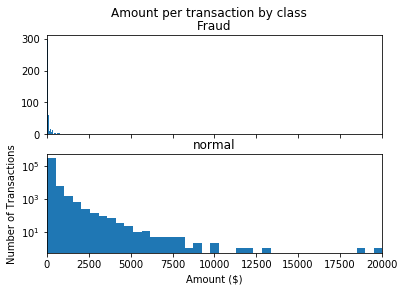

In [40]:
b, (ax1, ax2) = plt.subplots(2,1,sharex= True)
b.suptitle('Amount per transaction by class')
ax1.hist(fraud.Amount, bins = 50)
ax1.set_title('Fraud')
ax2.hist(normal.Amount, bins = 50)
ax2.set_title('normal')
plt.xlim(0,20000)
plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.yscale('log')

# Modèle

In [41]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.model_selection import train_test_split

In [42]:
x = Data[["V1","V2","V3","V4","V5","V6","V7","V8","V9","V10","V11","V12","V13","V14","V15","V16","V17","V18","V19","V20","V21","V22","V23","V24","V25","V26","V27","V28","Amount"]]
y = Data["Class"]
print(x , y)

               V1         V2        V3        V4        V5        V6  \
0       -1.359807  -0.072781  2.536347  1.378155 -0.338321  0.462388   
1        1.191857   0.266151  0.166480  0.448154  0.060018 -0.082361   
2       -1.358354  -1.340163  1.773209  0.379780 -0.503198  1.800499   
3       -0.966272  -0.185226  1.792993 -0.863291 -0.010309  1.247203   
4       -1.158233   0.877737  1.548718  0.403034 -0.407193  0.095921   
...           ...        ...       ...       ...       ...       ...   
284802 -11.881118  10.071785 -9.834783 -2.066656 -5.364473 -2.606837   
284803  -0.732789  -0.055080  2.035030 -0.738589  0.868229  1.058415   
284804   1.919565  -0.301254 -3.249640 -0.557828  2.630515  3.031260   
284805  -0.240440   0.530483  0.702510  0.689799 -0.377961  0.623708   
284806  -0.533413  -0.189733  0.703337 -0.506271 -0.012546 -0.649617   

              V7        V8        V9       V10  ...       V20       V21  \
0       0.239599  0.098698  0.363787  0.090794  ...  0.25141

In [43]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2)

In [44]:
modele_rf= RandomForestClassifier()
modele_knn = KNeighborsClassifier()
modele_lr = LogisticRegression(random_state=0)
modele_dt = tree.DecisionTreeClassifier()
modele_rf.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [45]:
modele_knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [46]:
modele_lr.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [47]:
modele_dt.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [48]:
y_predict_rf = modele_rf.predict(x_test)
y_predict_knn = modele_knn.predict(x_test)
y_predict_lr = modele_lr.predict(x_test)
y_predict_dt = modele_dt.predict(x_test)

# Le pourcentage de bien classés (accuracy) 

In [49]:
from sklearn.metrics import accuracy_score
accuracy_model_rf = accuracy_score(y_test,y_predict_rf)
accuracy_model_knn = accuracy_score(y_test,y_predict_knn)
accuracy_model_lr = accuracy_score(y_test,y_predict_lr)
accuracy_model_dt = accuracy_score(y_test,y_predict_dt)
print("Pourcentage de bien classés pour le modèle RF :",accuracy_model_rf)
print("Pourcentage de bien classés pour le modèle knn :",accuracy_model_knn)
print("Pourcentage de bien classés pour le modèle lr :",accuracy_model_lr)
print("Pourcentage de bien classés pour le modèle dt :",accuracy_model_dt)

Pourcentage de bien classés pour le modèle RF : 0.9994557775359011
Pourcentage de bien classés pour le modèle knn : 0.9992451107756047
Pourcentage de bien classés pour le modèle lr : 0.9990519995786665
Pourcentage de bien classés pour le modèle dt : 0.9990871107053826


On a plus de 99% de bien classé pour les 4 modèles.

# LA MATRICE DE CONFUSION

In [50]:
from sklearn.metrics import confusion_matrix

confusion_matrix_rf = confusion_matrix(y_test,y_predict_rf)
confusion_matrix_knn= confusion_matrix(y_test,y_predict_knn)
confusion_matrix_lr = confusion_matrix(y_test,y_predict_lr)
confusion_matrix_dt= confusion_matrix(y_test,y_predict_dt)

print("Matrice de confusion pour le modèle RF:", confusion_matrix_rf,sep="\n")
print("Matrice de confusion pour le modèle KNN:", confusion_matrix_knn,sep="\n")
print("Matrice de confusion pour le modèle lr:", confusion_matrix_rf,sep="\n")
print("Matrice de confusion pour le modèle dt:", confusion_matrix_knn,sep="\n")

Matrice de confusion pour le modèle RF:
[[56857     3]
 [   28    74]]
Matrice de confusion pour le modèle KNN:
[[56857     3]
 [   40    62]]
Matrice de confusion pour le modèle lr:
[[56857     3]
 [   28    74]]
Matrice de confusion pour le modèle dt:
[[56857     3]
 [   40    62]]


In [51]:
from sklearn.metrics import classification_report

print("Rapport pour le modèle RF :", classification_report(y_test,y_predict_rf), sep="\n")
print("Rapport pour le modèle KNN :", classification_report(y_test,y_predict_knn), sep="\n")
print("Rapport pour le modèle lr :", classification_report(y_test,y_predict_lr), sep="\n")
print("Rapport pour le modèle dt :", classification_report(y_test,y_predict_dt), sep="\n")


Rapport pour le modèle RF :
             precision    recall  f1-score   support

          0       1.00      1.00      1.00     56860
          1       0.96      0.73      0.83       102

avg / total       1.00      1.00      1.00     56962

Rapport pour le modèle KNN :
             precision    recall  f1-score   support

          0       1.00      1.00      1.00     56860
          1       0.95      0.61      0.74       102

avg / total       1.00      1.00      1.00     56962

Rapport pour le modèle lr :
             precision    recall  f1-score   support

          0       1.00      1.00      1.00     56860
          1       0.93      0.51      0.66       102

avg / total       1.00      1.00      1.00     56962

Rapport pour le modèle dt :
             precision    recall  f1-score   support

          0       1.00      1.00      1.00     56860
          1       0.75      0.74      0.74       102

avg / total       1.00      1.00      1.00     56962



On voit ici que le recall pour la classe 1, c'est à dire le nombre d'individus bien classés est mauvais pour les deux méthodes.

# La courbe ROC

Lorsque les classes sont fortement déséquilibrées, la matrice de confusion est parfois dure à interpréter. La courbe ROC ( Receiver Operating Characteristic) est là pour combler ce défaut. Elle est en faite la proportion de vrais positifs en fonction de la proportion de faux positifs.

In [52]:
from sklearn.metrics import roc_curve

In [53]:
proba_rf = modele_rf.predict_proba(x_test)[:,1]
proba_knn = modele_knn.predict_proba(x_test)[:,1]
proba_lr = modele_lr.predict_proba(x_test)[:,1]
proba_dt = modele_dt.predict_proba(x_test)[:,1]

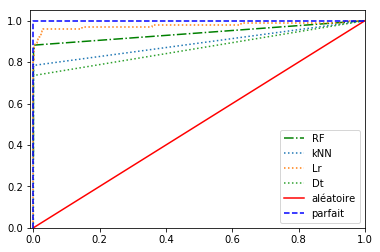

In [60]:
# cas du modèle RF
fpr, tpr, _ = roc_curve(y_test,proba_rf)
plt.plot(fpr,tpr,"g-.", label ="RF")
#cas du modèle kNN
fpr,tpr,_= roc_curve(y_test, proba_knn)
plt.plot(fpr,tpr,":",label="kNN")
# cas du modèle Lr
fpr, tpr, _ = roc_curve(y_test,proba_lr)
plt.plot(fpr,tpr,":", label ="Lr")
#cas du modèle Dt
fpr,tpr,_= roc_curve(y_test, proba_dt)
plt.plot(fpr,tpr,':',label="Dt")
#modèle aléatoire
plt.plot([0,1],[0,1],"r-", label="aléatoire",)
#modèle parfait
plt.plot([0,0, 1],[0,1, 1], 'b--', label= "parfait")

plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.05])
plt.legend()

# L'aire sous la courbe ROC

In [61]:
from sklearn.metrics import roc_auc_score
auc_modele_rf = roc_auc_score(y_test, modele_rf.predict_proba(x_test)[:,1])
auc_modele_knn = roc_auc_score(y_test, modele_knn.predict_proba(x_test)[:,1])
auc_modele_lr = roc_auc_score(y_test, modele_lr.predict_proba(x_test)[:,1])
auc_modele_dt = roc_auc_score(y_test, modele_dt.predict_proba(x_test)[:,1])
print("Aire sous la courbe ROC pour le modèle RF:", auc_modele_rf)
print("Aire sous la courbe ROC pour le modèle kNN:", auc_modele_knn)
print("Aire sous la courbe ROC pour le modèle lr:", auc_modele_lr)
print("Aire sous la courbe ROC pour le modèle dt:", auc_modele_dt)

Aire sous la courbe ROC pour le modèle RF: 0.9408836978336885
Aire sous la courbe ROC pour le modèle kNN: 0.8919878890705067
Aire sous la courbe ROC pour le modèle lr: 0.9782246384308207
Aire sous la courbe ROC pour le modèle dt: 0.8674272206244439


# La validation croisée

In [62]:
from sklearn.model_selection import cross_val_score

scores_rf = cross_val_score(modele_rf, x, y, cv=5, scoring='roc_auc')
scores_knn = cross_val_score(modele_knn, x, y, cv=5, scoring='roc_auc')
scores_lr = cross_val_score(modele_lr, x, y, cv=5, scoring='roc_auc')
scores_dt = cross_val_score(modele_dt, x, y, cv=5, scoring='roc_auc')

print("AUC pour RF :% 0.2f (+/-% 0.2f)"%(scores_rf.mean(),scores_rf.std()*2))
print("AUC pour knn :% 0.2f (+/-% 0.2f)"%(scores_knn.mean(),scores_knn.std()*2))
print("AUC pour lr :% 0.2f (+/-% 0.2f)"%(scores_lr.mean(),scores_lr.std()*2))
print("AUC pour dt :% 0.2f (+/-% 0.2f)"%(scores_dt.mean(),scores_dt.std()*2))

AUC pour RF : 0.92 (+/- 0.04)
AUC pour knn : 0.86 (+/- 0.11)
AUC pour lr : 0.97 (+/- 0.02)
AUC pour dt : 0.86 (+/- 0.07)
